In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pickle

In [3]:
#Load the dataset
df=pd.read_csv(r"C:\Users\REBU\Desktop\dl_2\diabetes.csv")

In [4]:
# Explore the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Summary statistics of the dataset to understand its distribution and scale
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are erroneous data in featues like: SkinThickness, BloodPressure, Clucose and Insulin, as some values are recorded as 0 

In [89]:
# Now let's handle the erroneous data in features like Glucose, BloodPressure, SkinThickness, and Insulin by replacing the 0's to its mean.

# Initialize SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Replace zeros with NaN
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, float('nan'))

# Impute zeros with the mean
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [90]:
# Show the updated summary statistics of the dataset 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [91]:
# Count the occurrences of different classes in the "Outcome" column
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

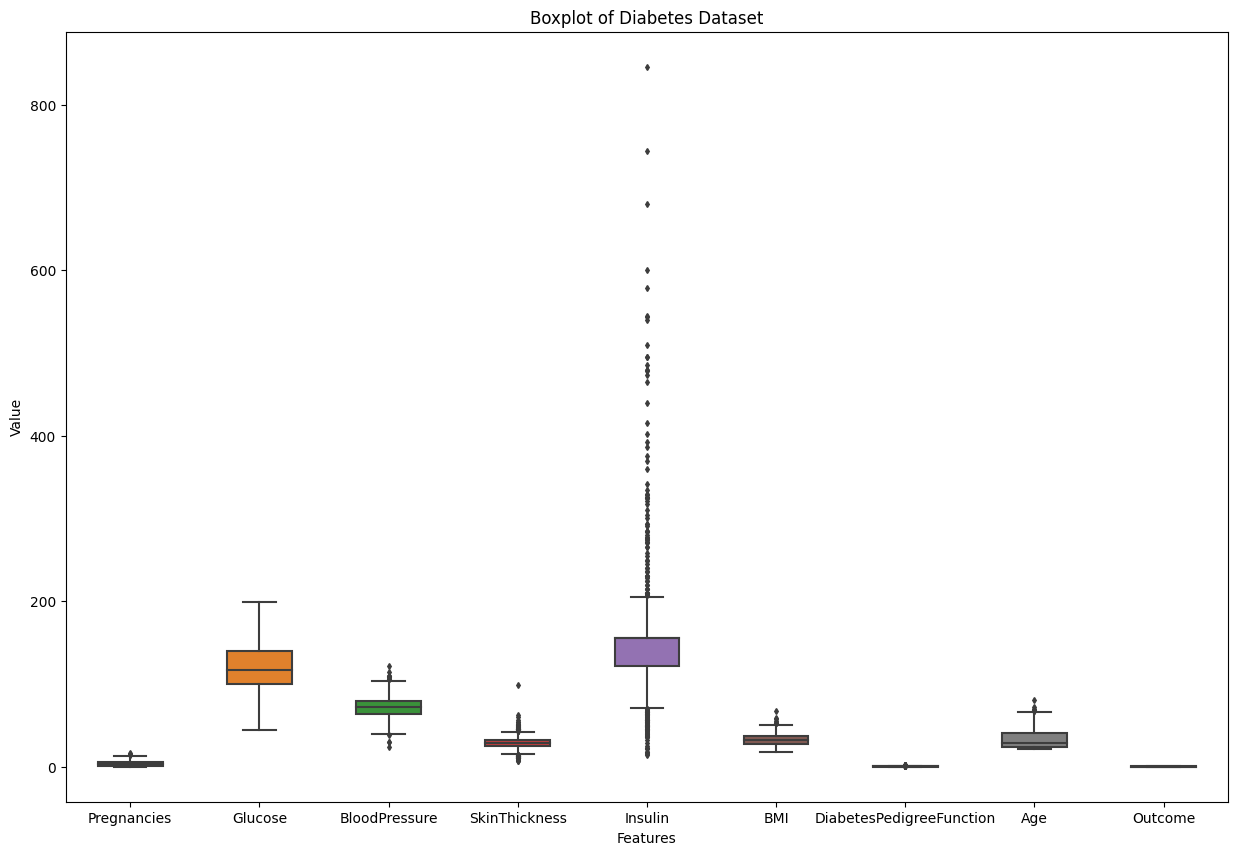

In [92]:
# Despite addressing the issue of zero values, the data appears improved. However, there still exist outliers in certain columns. Let's visualize these outliers.
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)

# Adding the title and labels
ax.set_title('Boxplot of Diabetes Dataset')
ax.set_ylabel('Value')
ax.set_xlabel('Features')

# Show the plot
plt.show()

In [93]:
# Split dataset into features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [94]:
# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [96]:
# Build a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [97]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,model.predict_proba(X_test)[:, 1])

In [98]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622642
ROC-AUC: 0.82


Observation: The numbers we get from the model (coefficients) help us understand which factors are linked to having diabetes.
If a number is positive, it means that as that factor goes up, the chances of having diabetes also go up. 
If the number is negative, it means that as that factor goes up, the chances of having diabetes go down.
So, these numbers give us clues about what might be influencing the likelihood of having diabetes.

In [116]:
# Interpret the model coefficients
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
print(coefficients)

                          Coefficient
Pregnancies                  0.228737
Glucose                      1.095331
BloodPressure               -0.145340
SkinThickness                0.071388
Insulin                     -0.094892
BMI                          0.673791
DiabetesPedigreeFunction     0.196784
Age                          0.403497


In [117]:
# Save the logistic regression model to a pickle file
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)

GridSearchCV is used in hyperparameter tuning process.It helps to find the combition of hyperparameters that yields the best performance for my model.


In [100]:
# Now, let's tune the model
# Define the parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l2'],  # Use 'l2' penalty for lbfgs solver
              'solver': ['lbfgs']}

In [101]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [102]:
# Get the best parameters
best_params = grid_search.best_params_

In [103]:
# Build the model with the best parameters
best_log_reg_model = LogisticRegression(**best_params)
best_log_reg_model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [104]:
# Evaluate the model after hyperparameter tuning
y_pred = best_log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [109]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[84 15]
 [21 34]]


Observation: Tuning the hyperparameters of the model resulted in enhanced performance metrics such as accuracy, precision, F1 score, and ROC AUC score. 

In [110]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7662337662337663
Precision: 0.6938775510204082
Recall: 0.6181818181818182
F1 Score: 0.6538461538461539
ROC AUC Score: 0.7333333333333334


In [113]:
# Interpret the model coefficients for the best model
coefficients_best = pd.DataFrame({'Feature': range(X_train.shape[1]), 'Coefficient': best_log_reg_model.coef_[0]})
coefficients_best = coefficients_best.sort_values(by='Coefficient', ascending=False)
print(coefficients_best)

   Feature  Coefficient
1        1     0.954465
5        5     0.572261
7        7     0.359514
0        0     0.215002
6        6     0.181083
3        3     0.098397
4        4    -0.037271
2        2    -0.090060


Confusion Matrix:
[[84 15]
 [21 34]]
